<a href="https://colab.research.google.com/github/ChoiDae1/ChoiDae1/blob/main/K-Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy


--2021-11-30 14:03:43--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-11-30 14:03:43--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-11-30 14:03:44--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

(300, 100, 100)


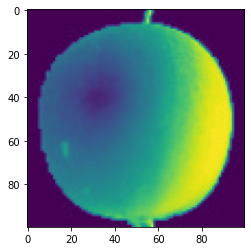

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')
print(fruits.shape)
img  = fruits[0]
plt.imshow(img)
plt.show()
fruits_2d = fruits.reshape(-1,100*100)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
print(km.labels_)
print(np.unique(km.labels_, return_counts=True))

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [ ]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n= len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows< 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if 10*i+j < n:
        axs[i,j].imshow(arr[10*i+j], cmap='gray_r')
        axs[i,j].axis('off')
plt.show() 

[[3393.8136117  8837.37750892 5267.70439881]]
[0]
4


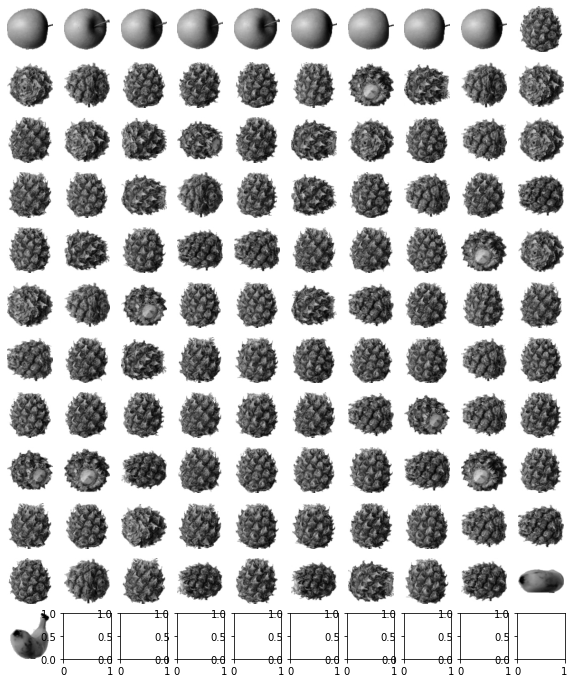

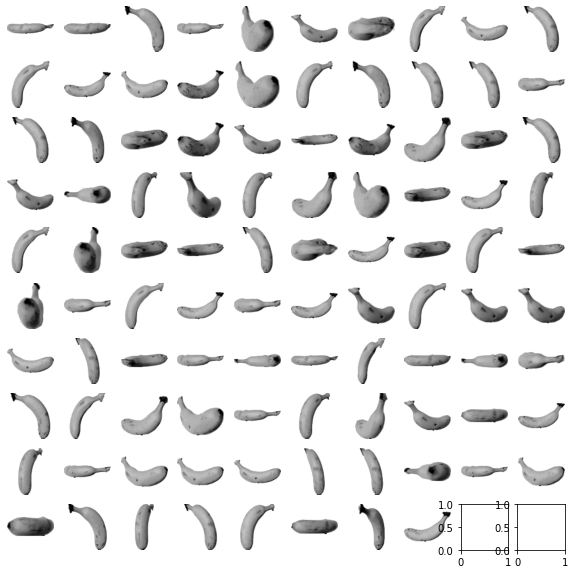

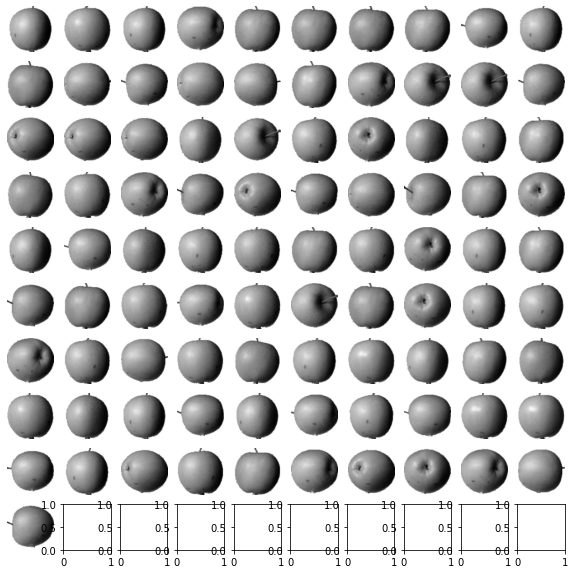

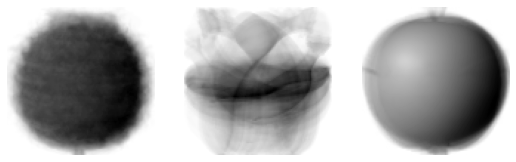

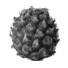

In [ ]:
draw_fruits(fruits[km.labels_==0])
draw_fruits(fruits[km.labels_==1])
draw_fruits(fruits[km.labels_==2])
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)
print(km.transform(fruits_2d[100:101]))
print(km.predict(fruits_2d[100:101]))
draw_fruits(fruits[100:101])
print(km.n_iter_)

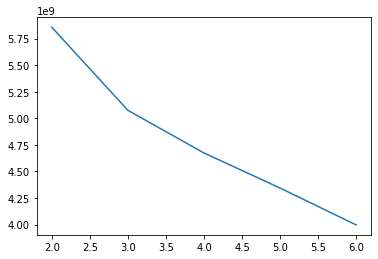

In [ ]:
inertia=[]#inertia는 cluster 중심과 cluster에 속한 샘프 사이의 거리를 제곱한 합
for k in range(2,7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.show()#일반적으로 k값이 증가하면, inertia가 줄어듬 -> 그래프가 꺽이는 지점이 최적의 클러스터 개수